In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras


## MNIST data classification using ANN

In [21]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

In [22]:
X_train.shape

# 28x28 is image size with 60,000 such images in train data

(60000, 28, 28)

In [23]:
X_test.shape

# 28x28 is image size with 10,000 such images in test data

(10000, 28, 28)

The X variable is : The below image 
The corresponding Y variable is :  5


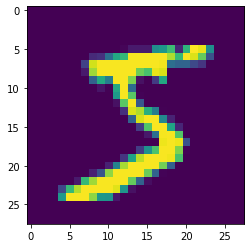

In [24]:
print('The X variable is : The below image ')
plt.imshow(X_train[0])

print('The corresponding Y variable is : ',Y_train[0])

In [25]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [26]:
# Scaling

X_train= X_train/255
X_test=X_test/255

#### One way is to flatten image first manually and then built a simple one layer and output model

In [27]:
# Since the size of the image is 28X28, now convert this to single dimensional array, for that Flatten is used.

print('Current shape of X_train is :',X_train.shape)
X_train_flattened=X_train.reshape(len(X_train),28*28)
print('Flattened X_train is :',X_train_flattened.shape)

Current shape of X_train is : (60000, 28, 28)
Flattened X_train is : (60000, 784)


In [28]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [29]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [30]:
print('Current shape of X_test is :',X_test.shape)
X_test_flattened=X_test.reshape(len(X_test),28*28)
print('Flattened X_test is :',X_test_flattened.shape)

Current shape of X_test is : (10000, 28, 28)
Flattened X_test is : (10000, 784)


In [31]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(10,input_shape=(784,),activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='Adadelta',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [38]:
model.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2572 - accuracy: 0.9282
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2568 - accuracy: 0.9284
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2565 - accuracy: 0.9284
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2563 - accuracy: 0.9285
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2561 - accuracy: 0.9286


#### Second method is using Flatten function automatically flattening the image

In [39]:
import keras.backend as k
## The info about dimensions is not given (1 dim or 2 dim or 3 dim

#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
img_rows, img_cols=28,28
if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [40]:
input_shape

(28, 28, 1)

In [41]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model=Sequential()
model.add(Flatten())
model.add(Dense(10,input_shape=input_shape,activation='sigmoid'))

In [42]:
model.compile(optimizer='Adadelta',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [43]:
model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4018 - accuracy: 0.0849
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3004 - accuracy: 0.1290
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2058 - accuracy: 0.1892
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1186 - accuracy: 0.2601
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.0374 - accuracy: 0.3309


In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (32, 784)                 0         
_________________________________________________________________
dense_2 (Dense)              (32, 10)                  7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [45]:
# To test on test data

model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.9969 - accuracy: 0.3628


[1.996896505355835, 0.3628000020980835]

### Check the predictions

In [46]:
Y_predict=model.predict(X_test)

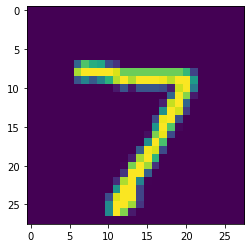

In [47]:
plt.imshow(X_test[0])

In [48]:
# possible probabilities for values from 0 to 9
Y_predict[0]

array([0.558906  , 0.31311518, 0.42464966, 0.3955823 , 0.6511296 ,
       0.45818302, 0.36384976, 0.6297667 , 0.4932121 , 0.58264613],
      dtype=float32)

In [49]:
# To print which number is having max probability from 0 to 9 => our final prediction value
np.argmax(Y_predict[0])

4

In [50]:
print('Actual :',Y_test[0])
print('Predicted :',np.argmax(Y_predict[0]))

Actual : 7
Predicted : 4


In [51]:
Y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [52]:
Y_predict[0:5]

array([[0.558906  , 0.31311518, 0.42464966, 0.3955823 , 0.6511296 ,
        0.45818302, 0.36384976, 0.6297667 , 0.4932121 , 0.58264613],
       [0.4037784 , 0.6601366 , 0.52333075, 0.4629963 , 0.4754394 ,
        0.6640824 , 0.45393556, 0.2203581 , 0.55067116, 0.40389103],
       [0.37056485, 0.52724165, 0.58755535, 0.53420734, 0.5230347 ,
        0.48311692, 0.4672418 , 0.56572473, 0.4359736 , 0.47510654],
       [0.59476477, 0.35558826, 0.45073688, 0.47462228, 0.54255116,
        0.52980345, 0.3387249 , 0.532465  , 0.46493822, 0.36118716],
       [0.5809587 , 0.3149023 , 0.42340252, 0.37591076, 0.53055376,
        0.34853327, 0.37613606, 0.48451963, 0.37660414, 0.55306214]],
      dtype=float32)

In [53]:
Y_predict_labels=[np.argmax(i) for i in Y_predict]
Y_predict_labels[0:5]

[4, 5, 2, 0, 0]

In [54]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=Y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[600,   9,   7,  85,  85,  23,  21,   6, 135,   9],
       [  2, 122, 180, 345,   7,  18, 363,  80,  13,   5],
       [ 84, 169, 123, 350,  40, 104,  34,  24,  96,   8],
       [ 31, 170,   8, 615,   4,  14,  15,   7, 137,   9],
       [ 55,   0,  53, 124, 248,  19, 221,  64,  42, 156],
       [139,  31,   5, 211,  36, 116,  78,   8, 239,  29],
       [ 14,   0,  22, 124, 190,  40, 514,   9,  31,  14],
       [ 76,   7,  19,  80, 213,  39,  35, 419,  29, 111],
       [ 23,  20,  11, 303,  51,  34,  85,  22, 398,  27],
       [ 60,   5,  19,  72, 114,  13, 129,  74,  50, 473]])>

Text(69.0, 0.5, 'Truth')

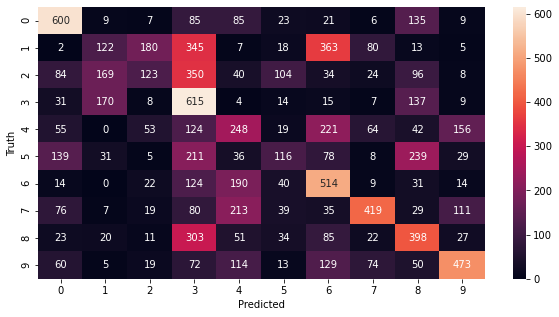

In [55]:
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Now let us add the hidden layers for the same ANN

In [56]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model=Sequential()
model.add(Dense(50,input_shape=input_shape,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='sigmoid'))

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 28, 28, 50)        100       
_________________________________________________________________
dense_4 (Dense)              (None, 28, 28, 100)       5100      
_________________________________________________________________
flatten_1 (Flatten)          (None, 78400)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                784010    
Total params: 789,210
Trainable params: 789,210
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(optimizer='Adadelta',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [59]:
model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 148s 79ms/step - loss: 2.1563 - accuracy: 0.5853
Epoch 2/5
1875/1875 [==============================] - 180s 96ms/step - loss: 1.7096 - accuracy: 0.7643
Epoch 3/5
1875/1875 [==============================] - 156s 83ms/step - loss: 1.1326 - accuracy: 0.8076
Epoch 4/5
1875/1875 [==============================] - 166s 89ms/step - loss: 0.7777 - accuracy: 0.8338
Epoch 5/5
1875/1875 [==============================] - 179s 95ms/step - loss: 0.6210 - accuracy: 0.8493


In [60]:
# To test on test data

model.evaluate(X_test,Y_test)

313/313 [==============================] - 11s 33ms/step - loss: 0.5503 - accuracy: 0.8653


[0.5502558350563049, 0.8652999997138977]